In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.ndimage import map_coordinates

In [4]:
def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

In [5]:
def rotation_matrix_derivative(theta):
    return np.array([
        [-np.sin(theta), -np.cos(theta)],
        [np.cos(theta), -np.sin(theta)]
    ])

In [6]:
def rotate_image(theta, image):
    h, w = image.shape

    y, x = np.indices((h, w))
    cx = w/2.0 - 0.5  # because of zero-indexing
    cy = h/2.0 - 0.5
    coords = np.vstack([(x - cx).ravel(), (y - cy).ravel()])

    R = rotation_matrix(theta)
    rotated = R @ coords
    
    x_rot = rotated[0,:] + cx
    y_rot = rotated[1,:] + cy

    I_rot = map_coordinates(image, [y_rot, x_rot], order=1, mode='constant', cval=0.0)
    I_rot = I_rot.reshape(h, w)

    return I_rot

In [18]:
def loss_and_gradient(theta, I_ref, I_mov):
    h, w = I_ref.shape

    y, x = np.indices((h, w))
    cx = w/2.0 - 0.5  # because of zero-indexing
    cy = h/2.0 - 0.5
    coords = np.vstack([(x - cx).ravel(), (y - cy).ravel()])

    R = rotation_matrix(theta)
    Rp = rotation_matrix_derivative(theta)
    rotated = R @ coords

    x_rot = rotated[0,:] + cx
    y_rot = rotated[1,:] + cy

    I_mov_rot = map_coordinates(I_mov, [y_rot, x_rot], order=1, mode='constant', cval=0.0)
    I_mov_rot = I_mov_rot.reshape(h, w)

    grad_y, grad_x = np.gradient(I_mov)

    gx = map_coordinates(grad_x, [y_rot, x_rot], order=1, mode='constant', cval=0.0)
    gy = map_coordinates(grad_y, [y_rot, x_rot], order=1, mode='constant', cval=0.0)

    N = I_ref.shape[0] * I_ref.shape[1]
    diff = I_mov_rot - I_ref
    loss = np.sum(diff**2) / N

    Rp_coords = Rp @ coords
    dxdtheta = Rp_coords[0,:]
    dydtheta = Rp_coords[1,:]

    grad_term = gx * dxdtheta + gy * dydtheta
    dloss = 2.0/N * np.sum(diff.ravel() * grad_term)
    
    return loss, dloss

In [19]:
def gradient_update(theta, I_ref, I_mov, step_size):
    loss, grad = loss_and_gradient(theta, I_ref, I_mov)
    theta_new = theta - step_size * grad
    return loss, theta_new

In [20]:
def gradient_descent(theta_init, I_ref, I_mov, step_size, max_steps, loss_threshold):
    theta = theta_init
    loss, grad = loss_and_gradient(theta, I_ref, I_mov)
    history = [(loss, theta)]

    step_num = 1
    while step_num < max_steps and loss > loss_threshold:
        loss, theta = gradient_update(theta, I_ref, I_mov, step_size)
        history.append((loss, theta))
        step_num += 1

    success = loss <= loss_threshold

    return history, theta, success

## Test image

In [21]:
import cv2

In [22]:
letter_l = cv2.imread('letter_l.jpg', cv2.IMREAD_GRAYSCALE)

In [41]:
letter_l = (255 - letter_l)/255

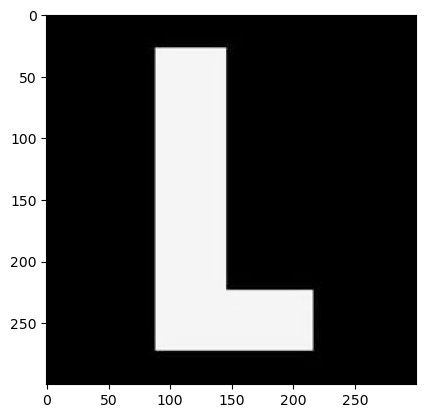

In [42]:
plt.imshow(letter_l, cmap='Grays_r')

In [43]:
rotated_letter_l = rotate_image(np.pi/2, letter_l)

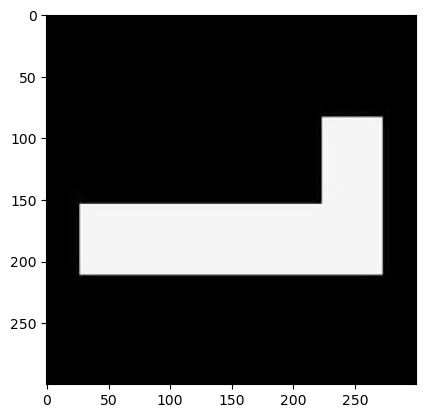

In [44]:
plt.imshow(rotated_letter_l, cmap='Grays_r')

In [77]:
history, theta, success = gradient_descent(-0.1, letter_l, rotated_letter_l, step_size=1.0, max_steps=50, loss_threshold=0.001)

In [78]:
history

[(np.float64(0.23585802954335894), -0.1),
 (np.float64(0.23585802954335894), np.float64(-0.10600558376339275)),
 (np.float64(0.2358200870058872), np.float64(-0.1122114576789818)),
 (np.float64(0.23578128046802466), np.float64(-0.11891255894928798)),
 (np.float64(0.23573416764359945), np.float64(-0.12598966211117557)),
 (np.float64(0.23568129362708146), np.float64(-0.13356993264288103)),
 (np.float64(0.23562217007789385), np.float64(-0.14171842131995355)),
 (np.float64(0.23555572106280248), np.float64(-0.15040953223599815)),
 (np.float64(0.2354755025994399), np.float64(-0.1599105284709979)),
 (np.float64(0.2353822936284372), np.float64(-0.17078391871413054)),
 (np.float64(0.23525469825456005), np.float64(-0.1846500217702841)),
 (np.float64(0.23502728798741107), np.float64(-0.2049834942549583)),
 (np.float64(0.234507975265488), np.float64(-0.23527301363183448)),
 (np.float64(0.23339914009115745), np.float64(-0.27786594195298586)),
 (np.float64(0.2312837053687322), np.float64(-0.334404721

In [79]:
success

np.True_

In [80]:
test = rotate_image(-1.5730558634130252, rotated_letter_l)

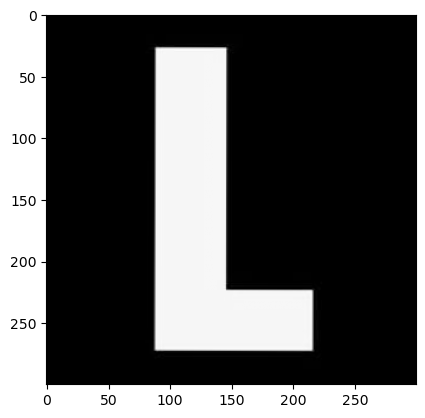

In [81]:
plt.imshow(test, cmap='Grays_r')

In [31]:
success

np.False_

In [84]:
history_arr = np.array(history)

In [86]:
history_arr

array([[ 2.35858030e-01, -1.00000000e-01],
       [ 2.35858030e-01, -1.06005584e-01],
       [ 2.35820087e-01, -1.12211458e-01],
       [ 2.35781280e-01, -1.18912559e-01],
       [ 2.35734168e-01, -1.25989662e-01],
       [ 2.35681294e-01, -1.33569933e-01],
       [ 2.35622170e-01, -1.41718421e-01],
       [ 2.35555721e-01, -1.50409532e-01],
       [ 2.35475503e-01, -1.59910528e-01],
       [ 2.35382294e-01, -1.70783919e-01],
       [ 2.35254698e-01, -1.84650022e-01],
       [ 2.35027288e-01, -2.04983494e-01],
       [ 2.34507975e-01, -2.35273014e-01],
       [ 2.33399140e-01, -2.77865942e-01],
       [ 2.31283705e-01, -3.34404721e-01],
       [ 2.27622380e-01, -4.07217371e-01],
       [ 2.21594156e-01, -5.00145959e-01],
       [ 2.11677388e-01, -6.21406014e-01],
       [ 1.94410274e-01, -7.78222771e-01],
       [ 1.71170189e-01, -9.22544682e-01],
       [ 1.49762038e-01, -1.08073186e+00],
       [ 1.21010707e-01, -1.29199568e+00],
       [ 7.36463010e-02, -1.53266393e+00],
       [ 8.

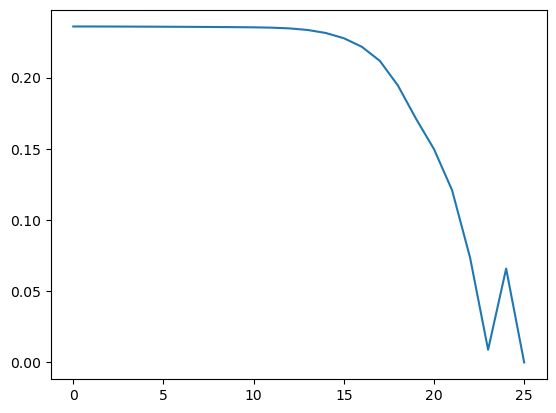

In [89]:
plt.plot(history_arr[:,0])
plt.savefig('loss_history_letter_l')